**WEEK2授業前課題1**

**小麦とチェス盤問題**

【問題1】2×2マスのチェス盤の小麦の数

In [0]:
# サンプルコード

n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2 * small_board_list[-1])
print('4マスの板に小麦を並べる（リスト）：{}'.format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [0]:
# サンプルコード

import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [0]:
ndarray_22 = small_board_ndarray.reshape(2, 2)
print(ndarray_22)

[[1 2]
 [4 8]]


【問題2】n×mマスへの拡張

In [0]:
import numpy as np


# まずはリストに格納
# 次にndarrayに変換
# 最後に行と列を欲しい形に変形

def mk_ndarray(n, m):
    n_square = n * m
    board_list = [1]
    for _ in range(n_square - 1):
        board_list.append(2 * board_list[-1])
    board_array = np.array(board_list)
    board_ndarray = board_array.reshape(n, m)
    
    return board_ndarray
  
  
print(mk_ndarray(8, 8))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

【問題3】小麦の数の合計

In [0]:
# 列平均のリストを返す関数を作る
# 総数を出すときは列平均リストを足し上げた上で、行数をかける

def col_mean_list(n, m):
    ndarray_mn = mk_ndarray(n, m)
    col_mean_list = []
    for i in range(m):
        col_sum = sum(ndarray_mn[:, i])
        col_mean = col_sum / n
        col_mean_list.append(col_mean)
    total = sum(col_mean_list) * n
        
    return col_mean_list, total
  

col_mean_list_88, total_88 = col_mean_list(8, 8)
print(total_88)
print(col_mean_list_88)

1.8446744073709552e+19
[9042521604759584.0, 1.808504320951917e+16, 3.617008641903834e+16, 7.234017283807667e+16, 1.4468034567615334e+17, 2.893606913523067e+17, 5.787213827046134e+17, 1.1574427654092268e+18]


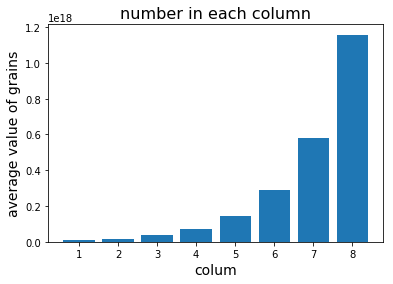

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('colum', fontsize=14)
plt.ylabel('average value of grains', fontsize=14)
plt.title('number in each column', fontsize=16)
plt.bar(np.arange(1, 9), np.array(col_mean_list_88))
plt.show()

【問題4】小麦の数のヒートマップ

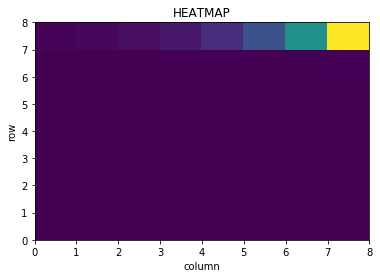

In [0]:
plt.xlabel('column')
plt.ylabel('row')
plt.title('HEATMAP')
plt.pcolor(mk_ndarray(8, 8))
plt.show()

【問題5】後半は前半の何倍か

In [0]:
# 小さい数(4×4行列)で実験してみる

ndarray_44 = mk_ndarray(4, 4)
row_list1 = []
for i in range(4):
    row_sum = sum(ndarray_44[i, :])
    row_list1.append(row_sum)
    pre_row_sum1 = sum(row_list1[0:2])
    post_row_sum1 = sum(row_list1[2:4])
print('後半は前半の{:.1f}倍'.format(post_row_sum1 / pre_row_sum1))

後半は前半の256.0倍


In [0]:
# 上の結果を一般化する

def mul(n, m):
    ndarray_nm = mk_ndarray(n, m)
    row_list = []
    for i in range(n):
        row_sum = sum(ndarray_nm[i, :])
        row_list.append(row_sum)
        num = int(n / 2)
        pre_row_sum = sum(row_list[0:num])
        post_row_sum = sum(row_list[num:m])
    
    return post_row_sum / pre_row_sum
  
  
print('後半は前半の{:.1f}倍'.format(mul(8, 8)))

後半は前半の4294967296.0倍


【問題6】他の計算方法によるn×mマスへの拡張

In [0]:
# np.append()を使った方法

n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2 * small_board_ndarray[-1])
print('4マスの板に小麦を並べる（ndarray）：{}'.format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [0]:
# ブロードキャストを利用した方法

n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2 ** indices_of_squares
print('4マスの板に小麦を並べる（ndarray）：{}'.format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [0]:
# ndarrayの型

n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1])
print('最後のマスの小麦の数：{}個'.format(board_ndarray[-1]))

print(board_ndarray.dtype)

最後のマスの小麦の数：-9223372036854775808個
int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


In [0]:
# int64型 → uint64型

n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2 ** indices_of_squares
print('最後のマスの小麦の数：{}個'.format(board_ndarray[-1]))

最後のマスの小麦の数：9223372036854775808個


In [0]:
# n×mマスのチェス盤の小麦の数を記したndarrayを返す関数（np.append()版）

def mk_ndarray_2(n, m):
    n_squares = n * m
    board_ndarray = np.array([1])
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1]).astype(np.uint64)
    ndarray_nm = board_ndarray.reshape(n, m)
    
    return ndarray_nm
  
  
print(mk_ndarray_2(8, 8))

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

In [0]:
# n×mマスのチェス盤の小麦の数を記したndarrayを返す関数（ブロードキャスト利用版）

def mk_ndarray_3(n, m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2 ** indices_of_squares
    ndarray_nm = board_ndarray.reshape(n, m)
    
    return ndarray_nm
  
  
print(mk_ndarray_3(8, 8))

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

【問題7】計算時間の比較

In [0]:
# mk_ndarray関数の計算時間

%%time
def mk_ndarray(n, m):
    n_squares = n * m
    board_list = [1]
    for _ in range(n_squares - 1):
        board_list.append(2 * board_list[-1])
    board_array = np.array(board_list)
    board_ndarray = board_array.reshape(n, m)
    
    return board_ndarray

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 13.4 µs


In [0]:
%%time
def mk_ndarray_2(n, m):
    n_squares = n * m
    board_ndarray = np.array([1])
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1]).astype(np.uint64)
    ndarray_nm = board_ndarray.reshape(n, m)
    
    return ndarray_nm

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10.7 µs


In [0]:
%%time
def mk_ndarray_3(n, m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2 ** indices_of_squares
    ndarray_nm = board_ndarray.reshape(n, m)
    
    return ndarray_nm

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 10.7 µs


【簡単な考察】
これらの結果から、一回リストに格納してからndarrayに変換する方法よりも、初めからndarray型で計算する方法や、ブロードキャストを利用する方が計算時間が早いことがわかる。

**ダミーデータの作成**

【問題1】乱数の作成

In [0]:
mu0 = [-3, 0]
sigma0 = [[1.0, 0.8], [0.8, 1.0]]
np.random.seed(0)
ndarray0 = np.random.multivariate_normal(mu0, sigma0, 500)
print(ndarray0.shape)

(500, 2)


【問題2】散布図による可視化

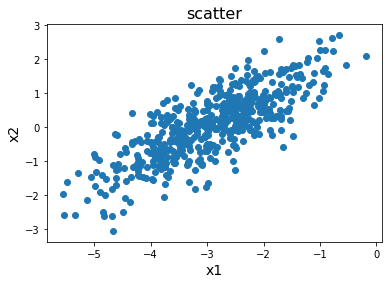

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('scatter', fontsize=16)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.scatter(ndarray0[:, 0], ndarray0[:, 1])
plt.show()

【問題3】ヒストグラムによる可視化

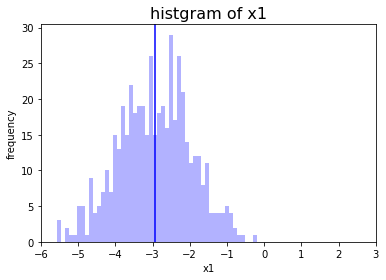

In [0]:
plt.xlim(-6, 3, 0.1)
plt.title('histgram of x1', fontsize=16)
plt.xlabel('x1')
plt.ylabel('frequency')
plt.hist(ndarray0[:, 0], bins=50, alpha=0.3, color='b')
plt.axvline(ndarray0[:, 0].mean(), color='b')

plt.show()

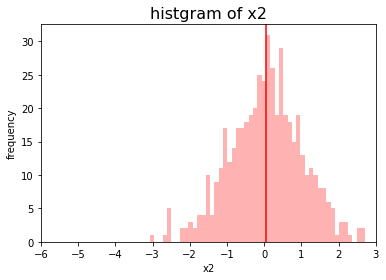

In [0]:
plt.xlim(-6, 3, 0.1)
plt.title('histgram of x2', fontsize=16)
plt.xlabel('x2')
plt.ylabel('frequency')
plt.hist(ndarray0[:, 1], bins=50, alpha=0.3, color='r')
plt.axvline(ndarray0[:, 1].mean(), color='r')

plt.show()

【問題4】データの追加

In [0]:
mu1 = [0, -3]
sigma1 = [[1.0, 0.8], [0.8, 1.0]]
ndarray1 = np.random.multivariate_normal(mu1, sigma1, 500)
print(ndarray1.shape)

(500, 2)


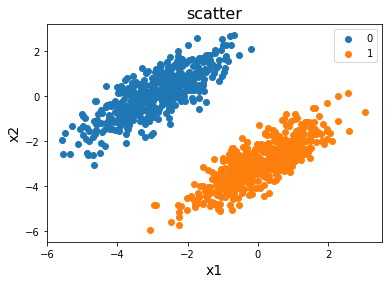

In [0]:
plt.title('scatter', fontsize=16)
plt.scatter(ndarray0[:, 0], ndarray0[:, 1], label='0')
plt.scatter(ndarray1[:, 0], ndarray1[:, 1], label='1')
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.legend();

【問題5】データの結合

In [0]:
# ndarray0とndarray1を結合して(1000, 2)のデータを作成

ndarray = np.vstack((ndarray0, ndarray1))
print(ndarray.shape)

(1000, 2)


【問題6】ラベル付け

In [0]:
ndarray_pre0 = ndarray[0:500]
ndarray_post0 = ndarray[500:]
ndarray_pre = np.insert(ndarray_pre0, 2, 0, axis=1)
ndarray_post = np.insert(ndarray_post0, 2, 1, axis=1)
ndarray_fin = np.vstack((ndarray_pre, ndarray_post))
print(ndarray_fin)

[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.2185878  -3.15676476  1.        ]
 [-1.37970304 -4.27950068  1.        ]
 [ 1.49786804 -2.33126243  1.        ]]


**行列積のスクラッチ**

【問題1】行列積を手計算する

In [0]:
import numpy as np
a_ndarray = np.array([[-1, 2, 3], [4, -5, 6], [7, 8, -9]])
b_ndarray = np.array([[0, 2, 1], [0, 2, -8], [2, 9, -1]])

Aのi行目(i=1, 2, 3)をベクトル（ベクトルiとする）と見做し、Bのj列目(j=1, 2, 3)もベクトル（ベクトルjとする）と見做す。AとBの行列積ABの(i, j)成分はベクトルiとベクトルjの内積によって得られる。
例）ABの(1, 1)成分AB(1, 1)の計算
　AB(1, 1) = (-1)×0 + 2×0 + 3×2 = 6
 
全てのについて同様の計算を行うとABは以下になる。

AB = [[6, 29, -20],
      [12, 52, 38],
      [-18, -51, -48]]

【問題2】Numpyの関数による計算

In [0]:
# np.matmul()の利用

a_b0 = np.matmul(a_ndarray, b_ndarray)
print(a_b0)

[[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]


In [0]:
# np.dot()の利用

a_b1 = np.dot(a_ndarray, b_ndarray)
print(a_b1)

[[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]


In [0]:
# 演算子@の利用

a_b2 = a_ndarray @ b_ndarray
print(a_b2)

[[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]


【問題3】ある要素の計算を実装

In [0]:
default_array0 = np.zeros((a_ndarray.shape[0], b_ndarray.shape[1]))

for i in range(a_ndarray.shape[0]):
    for j in range(b_ndarray.shape[1]):
        for k in range(a_ndarray.shape[1]):
            default_array0[i, j] += a_ndarray[i, k] * b_ndarray[k, j]
print(default_array0)

[[  6.  29. -20.]
 [ 12.  52.  38.]
 [-18. -51. -48.]]


【問題4】行列積を行う関数の作成

In [0]:
def matrix_mul(matrix1, matrix2):
    default_array = np.zeros((matrix1.shape[0], matrix2.shape[1]))
    
    for i in range(matrix1.shape[0]):
        for j in range(matrix2.shape[1]):
            for k in range(matrix1.shape[1]):
                default_array[i, j] = matrix1[i, k] * matrix2[k, j]
                
    return default_array
  
  
print(matrix_mul(a_ndarray, b_ndarray))

[[  6.  27.  -3.]
 [ 12.  54.  -6.]
 [-18. -81.   9.]]


【問題5】計算が定義されない入力を判定する

In [0]:
def modified_matrix_mul(matrix1, matrix2):
    if matrix1.shape[1] == matrix2.shape[0]:
        ndarray = np.zeros((matrix1.shape[0], matrix2.shape[1]))
        
        for i in range(matrix1.shape[0]):
            for j in range(matrix2.shape[1]):
                for k in range(matrix1.shape[1]):
                    ndarray[i, j] += matrix1[i, k] * matrix2[k, j]
                    
        return ndarray
      
    else:
        error_message = 'matrix1の列数とmatrix2の行数が異なるため、計算できません。'
        
        return error_message
      
      
print(modified_matrix_mul(a_ndarray, b_ndarray))

c_ndarray = np.array([[-1, 2, 3], [4, -5, 6]])
d_ndarray = np.array([[-9, 8, 7], [6, -5, 4]])
print(modified_matrix_mul(c_ndarray, d_ndarray))

[[  6.  29. -20.]
 [ 12.  52.  38.]
 [-18. -51. -48.]]
matrix1の列数とmatrix2の行数が異なるため、計算できません。


【問題6】転置

In [0]:
result = []
for i in range(3):
    for j in range(3):
        result.append(sum(a_ndarray[i] * b_ndarray.T[j]))
result_array = np.array(result)
result_array_ab = result_array.reshape(3, 3)
print(result_array_ab)

[[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]


In [0]:
# 関数にしてみる

def get_matrix_mul(matrix1, matrix2):
    fai_list = []
    for i in range(matrix1.shape[0]):
        for j in range(matrix2.shape[1]):
            fai_list.append(sum(matrix1[i] * matrix2.T[j]))
    mul_array = np.array(fai_list)
    mul_ndarray = mul_array.reshape(matrix1.shape[0], matrix2.shape[1])
    
    return mul_ndarray
  
  
print(get_matrix_mul(a_ndarray, b_ndarray))

[[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]


**ダーツ投げ問題**

【問題1】ダーツのまとを選ぶ

In [2]:
import numpy as np


aim_num = np.random.choice(np.arange(1, 7))
print(aim_num)

6


【問題2】ダーツを投げて、刺さった場所を記録する

In [3]:
mean = [aim_num, 0]
cov = [[0.01, 0], [0, 0.01]]
point_array = np.random.multivariate_normal(mean, cov)
print(point_array)

[ 5.98600548 -0.03497342]


【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する

In [4]:
# 一つのkeyに複数のvalueを格納する。

from collections import defaultdict


result = defaultdict(list)
for i in range(1000):
    aim_num = np.random.choice(np.arange(1, 7))
    mean = [aim_num, 0]
    cov = [[0.01, 0], [0, 0.01]]
    point_array = np.random.multivariate_normal(mean, cov)
    result[aim_num].append(point_array)
    
    
print(len(result))

6


【問題4】ダーツのまとと刺さった位置を描画する

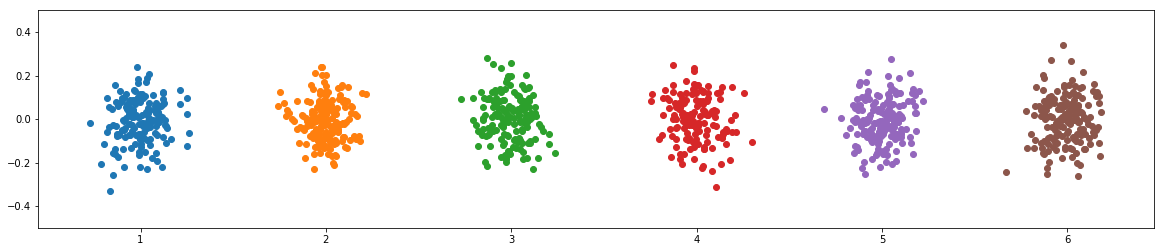

In [5]:
# 1番目の的
lst1 = []
for v1 in result[1]:
    lst1.append(v1)
    
x_list_1 = []
y_list_1 = []
for x1, y1 in lst1:
    x_list_1.append(x1)
    y_list_1.append(y1)


# 2番目の的
lst2 = []
for v2 in result[2]:
    lst2.append(v2)
    
x_list_2 = []
y_list_2 = []
for x2, y2 in lst2:
    x_list_2.append(x2)
    y_list_2.append(y2)
    

# 3番目の的
lst3 = []
for v3 in result[3]:
    lst3.append(v3)
    
x_list_3 = []
y_list_3 = []
for x3, y3 in lst3:
    x_list_3.append(x3)
    y_list_3.append(y3)
    
    
# 4番目の的
lst4 = []
for v4 in result[4]:
    lst4.append(v4)
    
x_list_4 = []
y_list_4 = []
for x4, y4 in lst4:
    x_list_4.append(x4)
    y_list_4.append(y4)
    

# 5番目の的
lst5 = []
for v5 in result[5]:
    lst5.append(v5)
    
x_list_5 = []
y_list_5 = []
for x5, y5 in lst5:
    x_list_5.append(x5)
    y_list_5.append(y5)
    
    
# 6番目の的
lst6 = []
for v6 in result[6]:
    lst6.append(v6)
    
x_list_6 = []
y_list_6 = []
for x6, y6 in lst6:
    x_list_6.append(x6)
    y_list_6.append(y6)
    
    
# matplotlibを使って散布図を描く
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 4))
plt.ylim(-0.5, 0.5)
plt.scatter(x_list_1, y_list_1)
plt.scatter(x_list_2, y_list_2)
plt.scatter(x_list_3, y_list_3)
plt.scatter(x_list_4, y_list_4)
plt.scatter(x_list_5, y_list_5)
plt.scatter(x_list_6, y_list_6)
plt.show()

【問題5】関数化

In [0]:
# 問題1〜問題4の手順を関数化する

import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline


# ある的におけるダーツが刺さった所の座標をkeyが的、valueが座標のディクショナリーを返す関数
def throw_darts(throw_times, target_num):    
    result = defaultdict(list)
    for i in range(throw_times):
        aim_num = np.random.choice(np.arange(1, target_num + 1))
        mean = [aim_num, 0]
        cov = [[0.01, 0], [0, 0.01]]
        point_array = np.random.multivariate_normal(mean, cov)
        result[aim_num].append(point_array)
        
    return result

# x座標、y座標各々を得る関数
def get_target_xlist(i):
    lsti = []
    for vi in result[i]:
        lsti.append(vi)
        
    x_list_i = []
    y_list_i = []
    for xi, yi in lsti:
        x_list_i.append(xi)
        y_list_i.append(yi)
        
    return x_list_i, y_list_i

  
# ある的に刺さったダーツの座標を散布図として返す関数
def draw_scatter(i):
    plt.figure(figsize=(20, 4))
    plt.ylim(-0.5, 0.5)
    plt.scatter(x_list_i, y_list_i)
    plt.show()
